In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

In [3]:
# Import audio data with librosa
debussy_path = "./audio/debussy.wav"
duke_path = "./audio/duke.wav"
redhot_path = "./audio/redhot.wav"

debussy, sr = librosa.load(path=debussy_path)
duke, _ = librosa.load(path=duke_path)
redhot, _ = librosa.load(path=redhot_path)

In [8]:
# Use librosa to extract the RMS Energys
rms_debussy = librosa.feature.rms(y=debussy)[0]
rms_duke = librosa.feature.rms(y=duke)[0]
rms_redhot = librosa.feature.rms(y=redhot)[0]

In [9]:
# Inspect debussy's rms energy
rms_debussy[:5]

array([0.0374665 , 0.04885463, 0.06051247, 0.06831237, 0.07136817],
      dtype=float32)

In [10]:
rms_debussy.shape

(1292,)

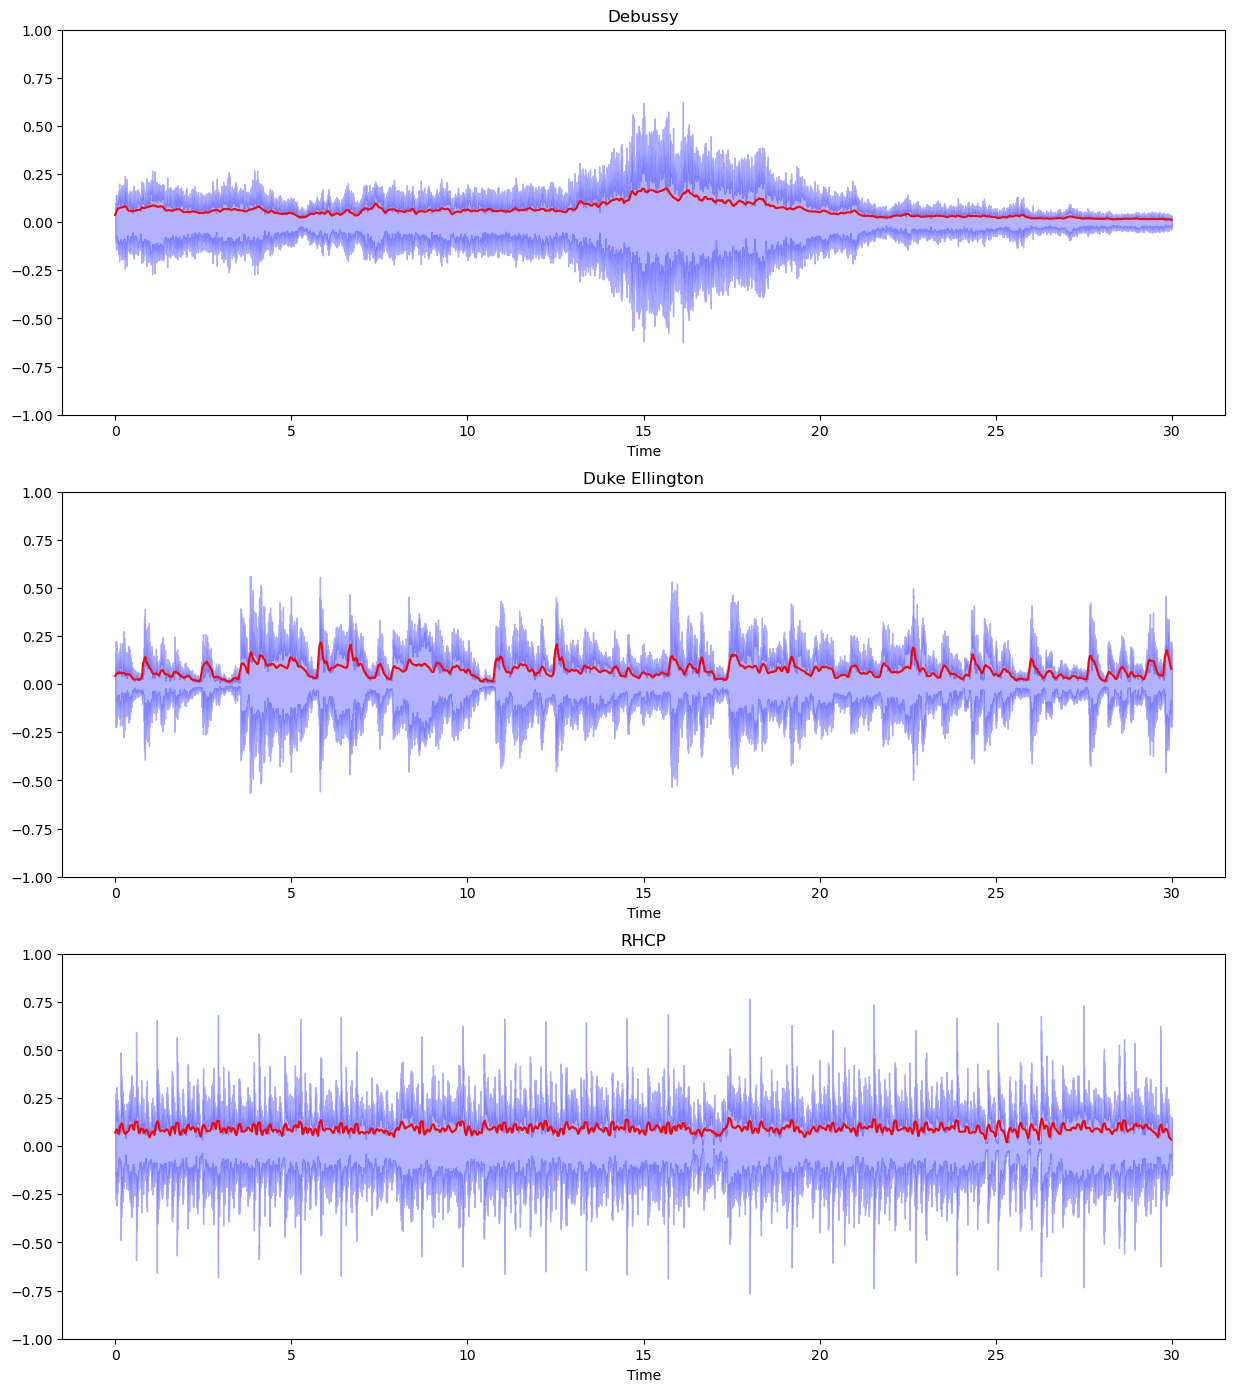

In [16]:
# Visualize all RMS Energies
FRAME_LENGTH = 1024
HOP_LENGTH = 512

all_signals = {
    "Debussy": debussy,
    "Duke Ellington": duke,
    "RHCP": redhot    
}

all_rms = {
    "Debussy": rms_debussy,
    "Duke Ellington": rms_duke,
    "RHCP": rms_redhot
}

frames = np.arange(stop=rms_debussy.size)
t = librosa.frames_to_time(frames=frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 17))

for i, name in enumerate(all_rms.keys()):
    plt.subplot(3, 1, i+1)
    plt.plot(t, all_rms[name], color='r')
    plt.ylim((-1, 1))
    plt.title(name)
    librosa.display.waveshow(y=all_signals[name], alpha=0.3, color='b')

plt.show()

As we can see, the RMS Energy is not as sensitive to outliers, and doesn't overfit the curve as much. This gives us a better overall picture of the signal's amplitude (energy)

Just for fun, let's build the `rms` function from scratch

In [38]:
def find_rms(signal: np.ndarray, frame_length: int = 1024, hop_length: int = 512) -> np.ndarray:
    """
    Returns the Root-Mean-Squared Energy of the signal

    Arguments:
        - signal (np.ndarray): a digital audio signal
        - frame_length (int): the frame length
        - hop_length (int): the hop length

    Returns:
        - rms (np.npdarray): the Root-Mean-Squared Energy of the signal
    """
    rms = []

    for i in range(0, len(signal), hop_length):
        current_energy = np.sqrt(np.sum(signal[i:i+frame_length]**2) / frame_length)
        rms.append(current_energy)

    return np.array(rms)

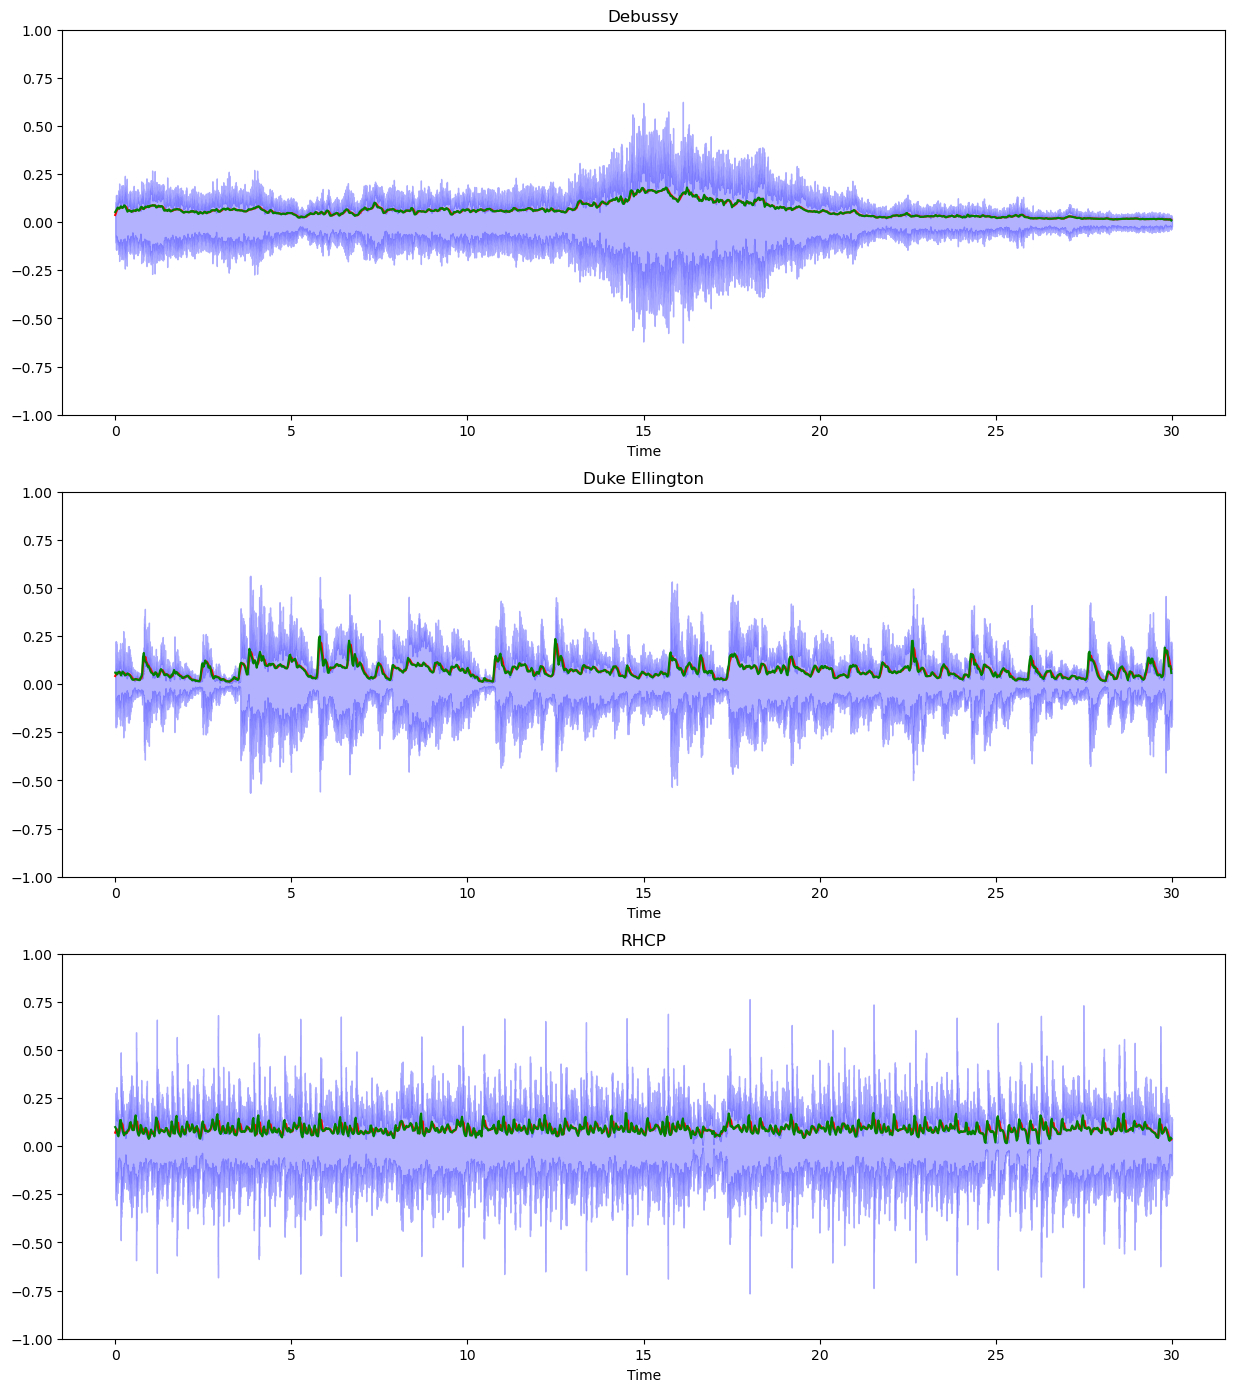

In [43]:
# Visualize all RMS Energies
FRAME_LENGTH = 1024
HOP_LENGTH = 512

all_signals = {
    "Debussy": debussy,
    "Duke Ellington": duke,
    "RHCP": redhot    
}

all_rms = {
    "Debussy": rms_debussy,
    "Duke Ellington": rms_duke,
    "RHCP": rms_redhot
}

all_test_rms = {
    "Debussy": find_rms(debussy),
    "Duke Ellington": find_rms(duke),
    "RHCP": find_rms(redhot)

}

frames = np.arange(stop=rms_debussy.size)
t = librosa.frames_to_time(frames=frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(15, 17))

for i, name in enumerate(all_rms.keys()):
    plt.subplot(3, 1, i+1)
    plt.plot(t, all_rms[name], color='r')
    plt.plot(t, all_test_rms[name], color='g')
    plt.ylim((-1, 1))
    plt.title(name)
    librosa.display.waveshow(y=all_signals[name], alpha=0.3, color='b')

plt.show()

Note that our implementation is slightly different from librosa's (as we can see from the output graphs), but they are essentially the same

Let's now move on to the Zero-Crossing-Rate

In [50]:
# Extract ZCRs from all signals
zcr_debussy = librosa.feature.zero_crossing_rate(y=debussy, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_redhot = librosa.feature.zero_crossing_rate(y=redhot, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_duke = librosa.feature.zero_crossing_rate(y=duke, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

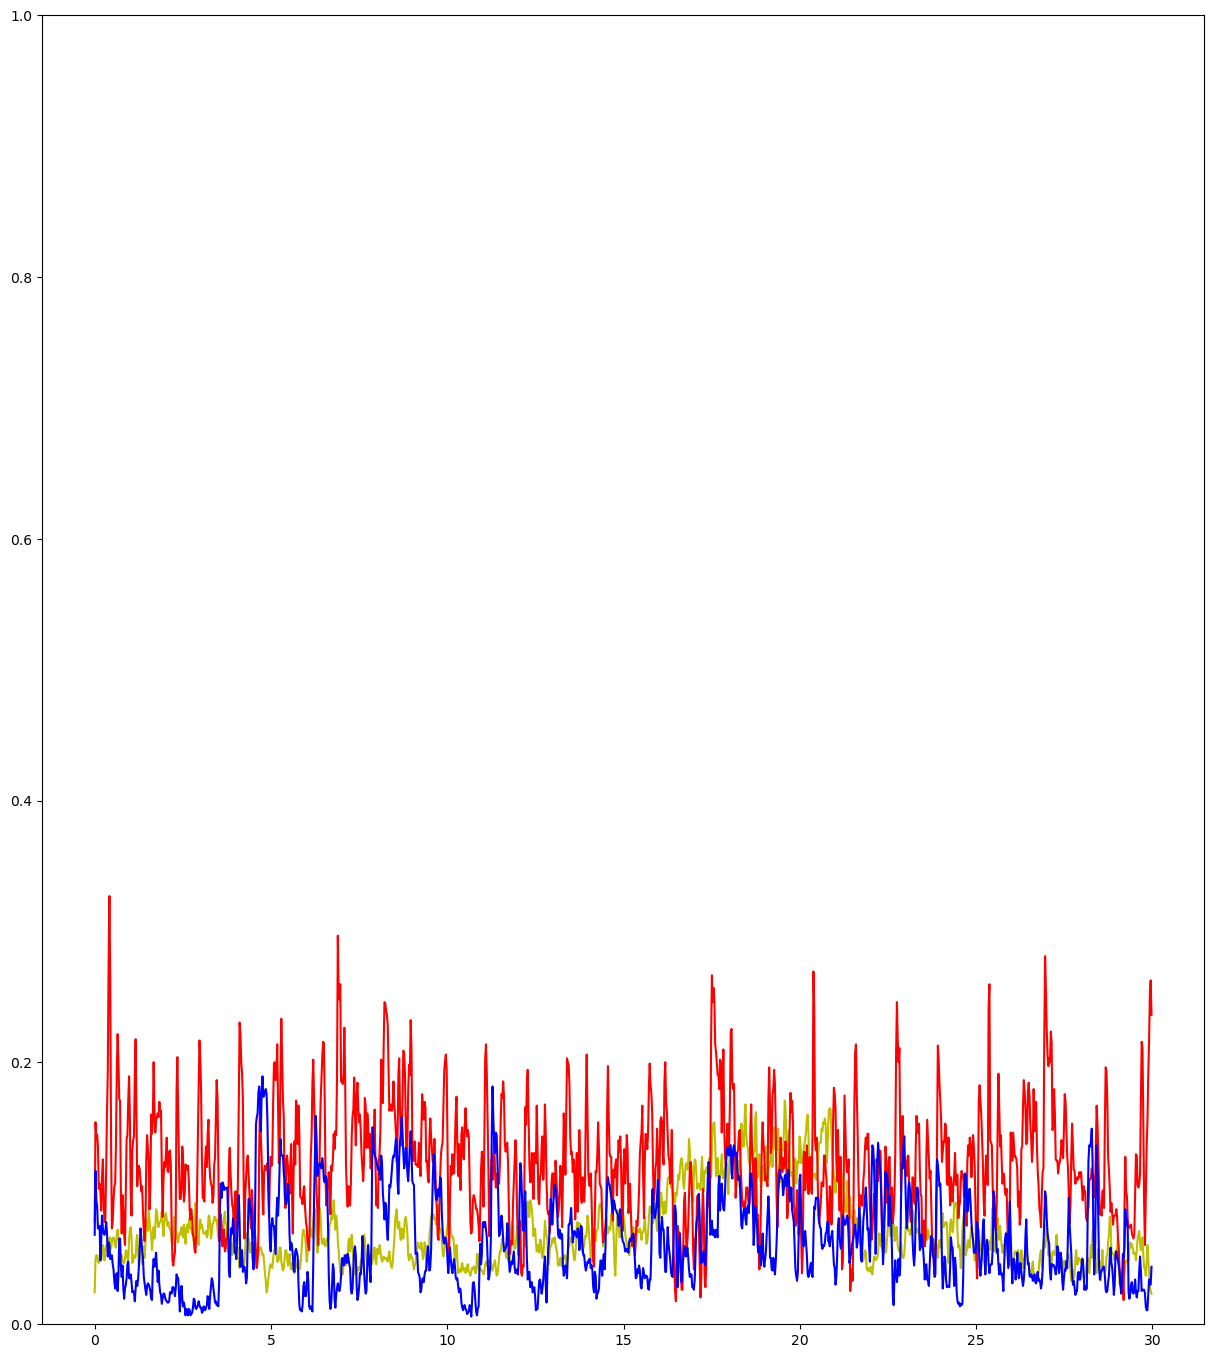

In [52]:
# Visualize the ZCRs
plt.figure(figsize=(15, 17))
plt.plot(t, zcr_debussy, color='y')
plt.plot(t, zcr_redhot, color='r')
plt.plot(t, zcr_duke, color='b')
plt.ylim((0, 1))
plt.show()

Now we'll see what the zero crossing rate looks like on voice and noise signals

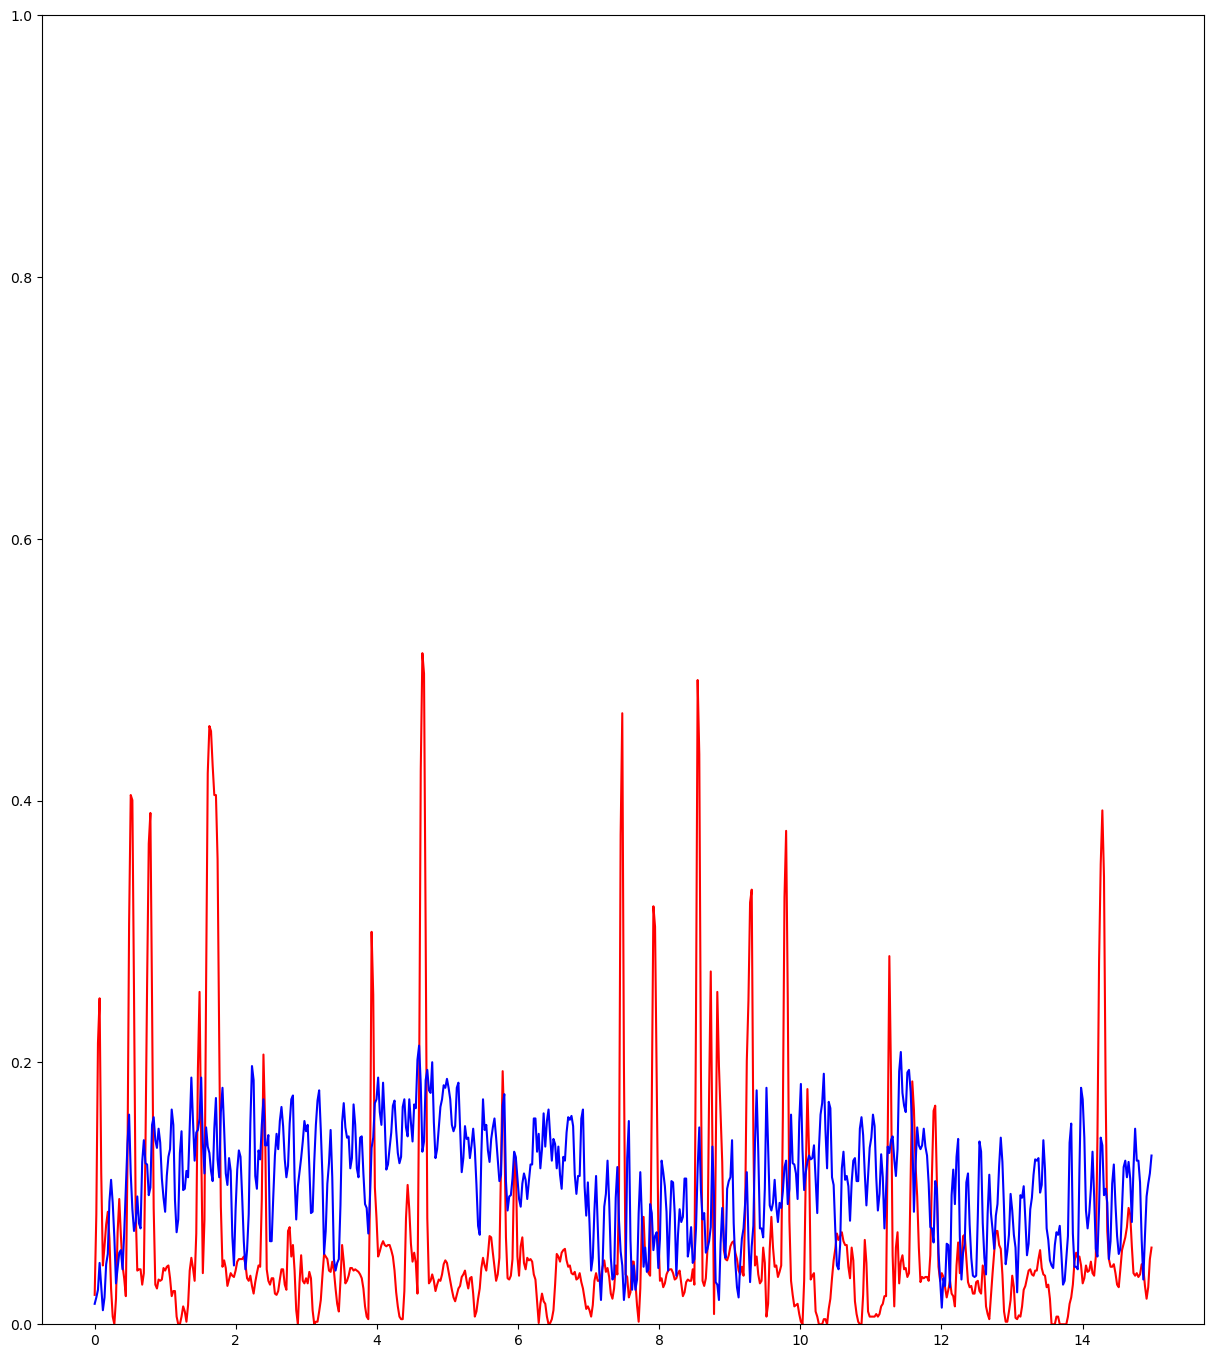

In [54]:
# Load files into librosa
voice_path = './audio/voice.wav'
noise_path = './audio/noise.wav'

voice, _ = librosa.load(voice_path, duration=15)
noise, _ = librosa.load(noise_path, duration=15)

# Find the ZCRs
zcr_voice = librosa.feature.zero_crossing_rate(
    y=voice, 
    frame_length=FRAME_LENGTH,
    hop_length=HOP_LENGTH
    )[0]

zcr_noise = librosa.feature.zero_crossing_rate(
    y=noise, 
    frame_length=FRAME_LENGTH,
    hop_length=HOP_LENGTH
    )[0]

# Recalculate the duration based on the number of frames
new_frames = np.arange(stop=len(zcr_voice))
new_t = librosa.frames_to_time(frames=new_frames)

# Visualize ZCR
plt.figure(figsize=(15, 17))
plt.plot(new_t, zcr_voice, color='r')
plt.plot(new_t, zcr_noise, color='b')
plt.ylim((0, 1))
plt.show()